In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from tqdm import tqdm, tqdm_notebook, tnrange
tqdm.pandas(desc='Progress')

In [3]:
import torchtext
from torchtext.data import Field, BucketIterator, TabularDataset

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
import os, sys
import re
import string
import itertools

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [8]:
print('Python version:',sys.version)
print('Pandas version:',pd.__version__)
print('Pytorch version:', torch.__version__)
print('Torch Text version:', torchtext.__version__)
print('Spacy version:', spacy.__version__)

Python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Pandas version: 1.1.5
Pytorch version: 1.7.0+cu101
Torch Text version: 0.3.1
Spacy version: 2.2.4


In [9]:
from google.colab import files
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Bot_sides')

Mounted at /content/drive


In [10]:
!ls

Chat2.ipynb			      response.json
chatbot_model.h5		      sentiment_tweets3.csv
Chat.ipynb			      sentiment_tweets3.gsheet
classes.pkl			      test.csv
combined_csv.csv		      train.csv
combined_csv.gsheet		      tut4-model.pt
Depression_detection_from_text.ipynb  tweets_combined.csv
Depression_Detection_Model2.ipynb     tweets_combined.gsheet
glove.6B.100d.txt		      Utilizing_Depression_Detection.ipynb
Integrated_Chat.ipynb		      val.csv
intents.json			      vocab.pkl
Model1.ipynb			      words.pkl
Model2.ipynb


In [11]:
df = pd.read_csv("tweets_combined.csv")

In [12]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [13]:
df.tail()

,Unnamed: 0,message,label
3308,3308,I have been as active and energetic as usual,0
3309,3309,I have felt rather low in energy along with bodily pains,1
3310,3310,I have been feeling very low in energy along with physical pains,1
3311,3311,I have been so haunted by my trauma recently,1
3312,3312,I am feeling kinda void and empty recently,1


In [14]:
df.label.value_counts()

0    2383
1    930 
Name: label, dtype: int64

[Text(0.5, 0, 'Labels')]

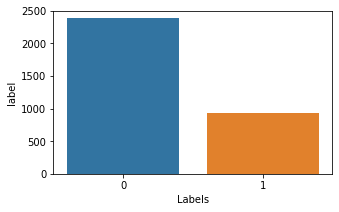

In [16]:
fig = plt.figure(figsize=(5,3))
ax = sns.barplot(x=df.label.unique(),y=df.label.value_counts())
ax.set(xlabel='Labels')

In [15]:
df['message'] = df.message.progress_apply(lambda x: re.sub('\n', ' ', str(x)))

Progress: 100%|██████████| 3313/3313 [00:00<00:00, 418017.24it/s]


In [17]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [18]:
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

In [19]:
def tweet_clean(text):
    text = re.sub(r'https?:/\/\S+', ' ', text) # remove urls
    text = re.sub(r'<([^>]*)>', ' ', text) # remove emojis
    text = re.sub(r'@\w+', ' ', text) # remove at mentions
    text = re.sub(r'#', '', text) # remove hashtag symbol
    text = re.sub(r'[0-9]+', ' ', text) # remove numbers
    text = replace_contractions(text)
    pattern = re.compile(r"[ \n\t]+")
    text = pattern.sub(" ", text)      
    text = "".join("".join(s)[:2] for _, s in itertools.groupby(text))    
    text = re.sub(r'[^A-Za-z0-9,?.!]+', ' ', text) # remove all symbols and punctuation except for . , ! and ?
    return text.strip()

In [20]:
nlp = spacy.load('en',disable=['parser', 'tagger', 'ner'])
def tokenizer(s): return [w.text.lower() for w in nlp(tweet_clean(s))]

In [21]:
TEXT = Field(sequential=True, tokenize=tokenizer, include_lengths=True, use_vocab=True)
TARGET = Field(sequential=False, use_vocab=False, pad_token=None, unk_token=None, is_target =False)

In [22]:
data_fields = [
    (None, None),
    ("message", TEXT), 
    ("label", TARGET)
]


In [23]:
def split_train_test(df, test_size=0.2):
    train, val = train_test_split(df, test_size=test_size,random_state=42)
    return train.reset_index(drop=True), val.reset_index(drop=True)

In [24]:
# create train and validation set 
train_val, test = split_train_test(df, test_size=0.2)
train, val = split_train_test(train_val, test_size=0.2)

In [25]:
train.to_csv("train.csv", index=False)
val.to_csv("val.csv", index=False)
test.to_csv("test.csv", index=False)

In [26]:
train

,Unnamed: 0,message,label
0,1871,The ravens are up 20-10 over the browns with under 4 mins to go. It isn't looking good for the texans.,0
1,820,"Love you all tonight. If the holiday makes u feel or lonely & u need someone to talk to, tweet me. I'll open my inbox for you. <3",0
2,1840,"When you living with someone that is manic depressed, life stops ???????”",0
3,3284,I want to disappear,1
4,793,Hopelessness is the enemy of . prevails where persists. â€” Bryan Stevenson,0
...,...,...,...
2115,3066,"A SPELLBINDING performance by @DebsNewbold. Electric physicality and sheer awe. A pleasure to watch, thank you. #ueafly",0
2116,2990,As a child I was scared of monsters beneath the bed. Now that I'm older I realize the monster Is me.,1
2117,1274,Let's start all over again.....\n#feels #lover #happiness #loyalty #truth,0
2118,2673,I looked for help and I got it. I looked for answers I found it. Now I need to find myself.,1


[Text(0, 0.5, 'counts'), Text(0.5, 0, 'Labels'), Text(0.5, 1.0, 'test')]

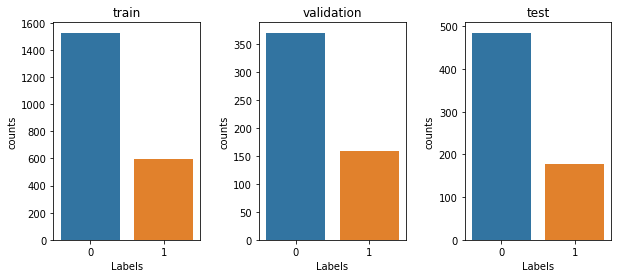

In [27]:
fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1,3,1)
ax = sns.barplot(x=train.label.unique(),y=train.label.value_counts())
ax.set(xlabel='Labels', ylabel="counts", title="train")

ax1 = fig.add_subplot(1,3,2)
ax1 = sns.barplot(x=val.label.unique(),y=val.label.value_counts())
ax1.set(xlabel='Labels', ylabel="counts", title="validation")

ax2 = fig.add_subplot(1,3,3)
ax2 = sns.barplot(x=test.label.unique(),y=test.label.value_counts())
ax2.set(xlabel='Labels', ylabel="counts", title="test")

In [28]:
train_data, val_data, test_data = TabularDataset.splits(path='./', format='csv', train='train.csv', validation='val.csv', test='test.csv', fields=data_fields, skip_header=True)

In [29]:

len(train_data), len(val_data), len(test_data)

(2120, 530, 663)

In [30]:
vec = torchtext.vocab.Vectors('glove.6B.100d.txt')

In [31]:
MAX_VOCAB_SIZE = 100_000

TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE,
                 vectors=vec)

TARGET.build_vocab(train_data)

In [32]:
TEXT.vocab.vectors.shape

torch.Size([5545, 100])

In [ ]:
TEXT.vocab.vectors

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.1638,  0.6046,  1.0789,  ..., -0.3140,  0.1844,  0.3624],
        ...,
        [-1.2557,  0.4047,  0.5831,  ..., -0.7994, -0.5224, -0.5118],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.6644, -0.3045,  0.6151,  ...,  0.1404,  0.5788, -0.0333]])

In [ ]:
train_data.fields

{None: None,
 'label': <torchtext.data.field.Field at 0x7f28ac1fb2b0>,
 'message': <torchtext.data.field.Field at 0x7f28ac1fb128>}

In [33]:
train_loader, val_loader, test_loader = BucketIterator.splits(datasets=(train_data, val_data, test_data), 
                                            batch_sizes=(3,3,3), 
                                            sort_key=lambda x: len(x.message), 
                                            device=None, 
                                            sort_within_batch=True, 
                                            repeat=False)

In [ ]:
len(train_loader), len(val_loader), len(test_loader)

(700, 175, 219)

In [34]:
batch = next(iter(train_loader))
type(batch)

torchtext.data.batch.Batch

In [ ]:
batch.label

tensor([0, 0, 0])

In [ ]:
batch.message

(tensor([[  69,  129,    4],
         [ 136,  230,  251],
         [   3,   17,   10],
         [ 150, 1815,   23],
         [ 239,   18,   80],
         [ 136,   29,   12],
         [  73,   70,   12],
         [2075, 2408,    4],
         [  44,   15,   29],
         [   8,   11,   16],
         [ 461,   89,  270],
         [  14,  335,   19],
         [   6,  356,   10],
         [ 126,  307,    5],
         [  10,    3,   24],
         [  30,   61,   98],
         [ 233,  348,  200],
         [  19,   23,   12],
         [   3,  727,   12],
         [ 734,   12,    1]]), tensor([20, 20, 19]))

In [ ]:
TEXT.vocab.itos[75]

'new'

In [35]:
def idxtosent(batch, idx):
    return ' '.join([TEXT.vocab.itos[i] for i in batch.message[0][:,idx].cpu().data.numpy()])

In [37]:
idxtosent(batch,0)

'i am always uncomfortable , especially now that i have picked up so much weight . i am the heaviest i have ever been in my life . .'

In [ ]:
batch.__dict__

{'batch_size': 3,
 'dataset': <torchtext.data.dataset.TabularDataset at 0x7f5844e26b38>,
 'fields': dict_keys([None, 'message', 'label']),
 'input_fields': ['message', 'label'],
 'label': tensor([0, 0, 0]),
 'message': (tensor([[  32, 3002,   32],
          [  68,  748,   68],
          [  14, 2956,    7],
          [ 594,    8,  594],
          [ 467, 9935,    5],
          [7862,    2,    3],
          [   2, 2956,   23],
          [  12,  273,   45],
          [   2,    5,   25],
          [ 334,   72,    8],
          [   6,  119,  234],
          [ 543,   11,   33],
          [  46,    4,   53],
          [  35,   72,    3],
          [ 287, 3002,   49],
          [ 880,  273,  127],
          [4605,    5,    3],
          [   9,   72,   37],
          [  42,  119,   31],
          [ 323,   11,  189],
          [   3,   20,    6],
          [  36,  637,  767],
          [  49,  119,    2],
          [   7,   11,   36],
          [ 150,    5,  116],
          [1066, 6540,  183],
  

In [39]:
class BatchGenerator:
    def __init__(self, dl, x_field, y_field):
        self.dl, self.x_field, self.y_field = dl, x_field, y_field
        
    def __len__(self):
        return len(self.dl)
    
    def __iter__(self):
        for batch in self.dl:
            X = getattr(batch, self.x_field)
            y = getattr(batch, self.y_field)
            yield (X,y)

In [40]:
train_batch_it = BatchGenerator(train_loader, 'message', 'label')
next(iter(train_batch_it))

((tensor([[   4,   28,    7],
          [  23,   60,    7],
          [  14,   13,    7],
          [  17,    6,   18],
          [2037,   56, 5010],
          [  27,   11,   10],
          [  94, 1314,  182],
          [   9,  443,   92],
          [   4,   13,   10],
          [  26,  407,   31],
          [  14,    7,  586],
          [  54,   14,   33],
          [1142,   19,   47],
          [1578,   25,    1]]), tensor([14, 14, 13])), tensor([0, 1, 1]))

In [41]:
vocab_size = len(TEXT.vocab)
embedding_dim = 100
n_hidden = 64
n_out = 2

In [42]:
vocab_size

5545

In [43]:
class ConcatPoolingGRUAdaptive(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_hidden, n_out, pretrained_vec, dropout, bidirectional=True):
        super().__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.n_hidden = n_hidden
        self.n_out = n_out
        self.bidirectional = bidirectional
        
        self.emb = nn.Embedding(self.vocab_size, self.embedding_dim)
        self.emb.weight.data.copy_(pretrained_vec)
        self.emb.weight.requires_grad = False
        self.gru = nn.GRU(self.embedding_dim, self.n_hidden, bidirectional=bidirectional)
        if bidirectional:
            self.fc = nn.Linear(self.n_hidden*2*2, self.n_out)
        else:
            self.fc = nn.Linear(self.n_hidden*2, self.n_out)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, seq, lengths):
        bs = seq.size(1)
        self.h = self.init_hidden(bs)
        seq = seq.transpose(0,1)
        embs = self.emb(seq)
        embs = embs.transpose(0,1)
        embs = pack_padded_sequence(embs, lengths)
        gru_out, self.h = self.gru(embs, self.h)
        gru_out, lengths = pad_packed_sequence(gru_out)        
        
        avg_pool = F.adaptive_avg_pool1d(gru_out.permute(1,2,0),1).view(bs,-1)
        max_pool = F.adaptive_max_pool1d(gru_out.permute(1,2,0),1).view(bs,-1) 
        
        cat = self.dropout(torch.cat([avg_pool,max_pool],dim=1))
        
        outp = self.fc(cat)
        return F.log_softmax(outp)
    
    def init_hidden(self, batch_size): 
        if self.bidirectional:
            return torch.zeros((2,batch_size,self.n_hidden)).to(device)
        else:
            return torch.zeros((1,batch_size,self.n_hidden)).cuda().to(device)

In [44]:
train_data.fields['message'].vocab.vectors

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.1638,  0.6046,  1.0789,  ..., -0.3140,  0.1844,  0.3624],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [45]:
x = torch.tensor([0,0,1])
int(torch.count_nonzero(x))
len(x)

3

In [46]:
def train(model, iterator, optimizer, criterion, num_batch):
    y_true_train = list()
    y_pred_train = list()
    total_loss_train = 0  
    count = 0
    bad_count = 0
        #t = tqdm_notebook(iterator, leave=False, total=num_batch)
    
    for (X,lengths),y in iterator:
        count+=1
        if torch.count_nonzero(lengths)==len(lengths):
            #t.set_description(f'Epoch {epoch}')
            lengths = lengths.cpu().numpy()

            opt.zero_grad()
            pred = model(X, lengths)
            loss = criterion(pred, y)
            loss.backward()
            opt.step()

            #t.set_postfix(loss=loss.item())
            pred_idx = torch.max(pred, dim=1)[1]

            y_true_train += list(y.cpu().data.numpy())
            y_pred_train += list(pred_idx.cpu().data.numpy())
            total_loss_train += loss.item()
        else:
            bad_count+=1
    print(count,bad_count)
    train_acc = accuracy_score(y_true_train, y_pred_train)
    train_loss = total_loss_train/num_batch
    return train_loss, train_acc


In [47]:
def evaluate(model, iterator, criterion, num_batch):
    y_true_val = list()
    y_pred_val = list()
    total_loss_val = 0
    count=0
    bad_count=0
    for (X,lengths),y in iterator: #tqdm_notebook(iterator, leave=False): 
        if torch.count_nonzero(lengths)==len(lengths):
            count+=1
            pred = model(X, lengths.cpu().numpy())
            loss = criterion(pred, y)
            pred_idx = torch.max(pred, 1)[1]
            y_true_val += list(y.cpu().data.numpy())
            y_pred_val += list(pred_idx.cpu().data.numpy())
            total_loss_val += loss.item()
        else:
            bad_count+=1
    print('ji',count,bad_count)
    valacc = accuracy_score(y_true_val, y_pred_val)
    valloss = total_loss_val/num_batch
    return valloss, valacc

In [49]:
train_loader, val_loader, test_loader = BucketIterator.splits(datasets=(train_data, val_data, test_data), 
                                            batch_sizes=(32,32,32), 
                                            sort_key=lambda x: len(x.message), 
                                            device=device, 
                                            sort_within_batch=True, 
                                            repeat=False)


In [50]:
train_batch_it = BatchGenerator(train_loader, 'message', 'label')
val_batch_it = BatchGenerator(val_loader, 'message', 'label')
test_batch_it = BatchGenerator(test_loader, 'message', 'label')

In [51]:
m = ConcatPoolingGRUAdaptive(vocab_size, embedding_dim, n_hidden, n_out, train_data.fields['message'].vocab.vectors, 0.5).to(device)
opt = optim.Adam(filter(lambda p: p.requires_grad, m.parameters()), 1e-3)

In [52]:
loss_fn=F.nll_loss
epochs=20

In [53]:
import time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [54]:
best_valid_loss = float('inf')
epochs=20
for epoch in range(epochs):      

    start_time = time.time()
    
    train_loss, train_acc = train(m, iter(train_batch_it), opt, loss_fn, len(train_batch_it))
    valid_loss, valid_acc = evaluate(m, iter(val_batch_it), loss_fn, len(val_batch_it))

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(m.state_dict(), 'tut4-model.pt')
          
        
    print(f'Epoch {epoch}: train_loss: {train_loss:.4f} train_acc: {train_acc:.4f} | val_loss: {valid_loss:.4f} val_acc: {valid_acc:.4f}')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


67 0
ji 17 0
Epoch 0: train_loss: 0.5954 train_acc: 0.7170 | val_loss: 0.5775 val_acc: 0.7113
67 0
ji 17 0
Epoch 1: train_loss: 0.5133 train_acc: 0.7439 | val_loss: 0.5363 val_acc: 0.7434
67 0
ji 17 0
Epoch 2: train_loss: 0.4626 train_acc: 0.7778 | val_loss: 0.5409 val_acc: 0.7321
67 0
ji 17 0
Epoch 3: train_loss: 0.4346 train_acc: 0.7901 | val_loss: 0.5517 val_acc: 0.7283
67 0
ji 17 0
Epoch 4: train_loss: 0.4341 train_acc: 0.7877 | val_loss: 0.5108 val_acc: 0.7415
67 0
ji 17 0
Epoch 5: train_loss: 0.4038 train_acc: 0.8090 | val_loss: 0.5107 val_acc: 0.7415
67 0
ji 17 0
Epoch 6: train_loss: 0.3729 train_acc: 0.8274 | val_loss: 0.5861 val_acc: 0.7340
67 0
ji 17 0
Epoch 7: train_loss: 0.3861 train_acc: 0.8203 | val_loss: 0.5031 val_acc: 0.7472
67 0
ji 17 0
Epoch 8: train_loss: 0.3558 train_acc: 0.8377 | val_loss: 0.5088 val_acc: 0.7679
67 0
ji 17 0
Epoch 9: train_loss: 0.3365 train_acc: 0.8514 | val_loss: 0.5002 val_acc: 0.7792
67 0
ji 17 0
Epoch 10: train_loss: 0.3115 train_acc: 0.8651 

In [55]:
test_loss, test_acc = evaluate(m, iter(test_batch_it), loss_fn, len(test_batch_it))

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

ji 21 0
Test Loss: 0.533 | Test Acc: 82.50%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [56]:
def save_vocab(vocab):
    import pickle
    output = open('vocab.pkl', 'wb')
    pickle.dump(vocab, output)
    output.close()

In [57]:
save_vocab(TEXT.vocab)